<a href="https://colab.research.google.com/github/GhazalehKeyvani/Data-Science-Exercises/blob/main/DL_transformers_PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deep learning for text**

In [ ]:
!pip install tensorflow

In [ ]:
!pip list | grep tensorflow

tensorflow                            2.18.0
tensorflow-datasets                   4.9.8
tensorflow_decision_forests           1.11.0
tensorflow-hub                        0.16.1
tensorflow-io-gcs-filesystem          0.37.1
tensorflow-metadata                   1.17.1
tensorflow-probability                0.25.0
tensorflow-text                       2.18.1


In [ ]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2025-05-27 18:37:27--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  11.9MB/s    in 9.3s    

2025-05-27 18:37:37 (8.63 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [ ]:
!tar -xf aclImdb_v1.tar.gz

In [ ]:


#!rm -r aclImdb

In [ ]:
!rm -r aclImdb/train/unsup

In [ ]:
!cat aclImdb/train/pos/4077_10.txt

I first saw this back in the early 90s on UK TV, i did like it then but i missed the chance to tape it, many years passed but the film always stuck with me and i lost hope of seeing it TV again, the main thing that stuck with me was the end, the hole castle part really touched me, its easy to watch, has a great story, great music, the list goes on and on, its OK me saying how good it is but everyone will take there own best bits away with them once they have seen it, yes the animation is top notch and beautiful to watch, it does show its age in a very few parts but that has now become part of it beauty, i am so glad it has came out on DVD as it is one of my top 10 films of all time. Buy it or rent it just see it, best viewing is at night alone with drink and food in reach so you don't have to stop the film.<br /><br />Enjoy

In [ ]:
#Shuffle the list of training
# files using a seed, to
# ensure we get the same
# validation set every time
# we run the code.
# Take 20% of the training
# files to use for validation.
# Move the files to aclImdb/val/neg
# and aclImdb/val/pos

import os, pathlib, shutil, random
base_dir = pathlib.Path("aclImdb")
val_dir = base_dir / "val"
train_dir = base_dir / "train"
for category in ("neg", "pos"):
 os.makedirs(val_dir / category)
 files = os.listdir(train_dir / category)
 random.Random(1337).shuffle(files)
 num_val_samples = int(0.2 * len(files))
 val_files = files[-num_val_samples:]
 for fname in val_files:
  shutil.move(train_dir / category / fname,
    val_dir / category / fname)

In [ ]:
from tensorflow import keras
batch_size = 32
train_ds = keras.utils.text_dataset_from_directory(
 "aclImdb/train", batch_size=batch_size
)
val_ds = keras.utils.text_dataset_from_directory(
 "aclImdb/val", batch_size=batch_size
)
test_ds = keras.utils.text_dataset_from_directory(
 "aclImdb/test", batch_size=batch_size
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(
    output_mode="int",       # خروجی به صورت اندیس‌های عددی
    max_tokens=20000,        # محدودیت تعداد واژه‌های موجود در واژگان
    output_sequence_length=600  # طول ثابت برای تمام دنباله‌ها (با padding یا truncation)
)

# تطبیق لایه با داده‌های آموزشی
text_only_train_ds = train_ds.map(lambda x, y: x)
text_vectorization.adapt(text_only_train_ds)

#Processing words as a set: The bag-of-words approach

SINGLE WORDS (UNIGRAMS) WITH BINARY ENCODING

11.2.3 Vocabulary indexing

In [ ]:
vocabulary = {}
for text in dataset:
 text = standardize(text)
 tokens = tokenize(text)
 for token in tokens:
  if token not in vocabulary:
    vocabulary[token] = len(vocabulary)

NameError: name 'dataset' is not defined

In [ ]:
def one_hot_encode_token(token):
 vector = np.zeros((len(vocabulary),))
 token_index = vocabulary[token]
 vector[token_index] = 1
 return vector

In [ ]:
import string
class Vectorizer:
 def standardize(self, text):
  text = text.lower()
  return "".join(char for char in text
  if char not in string.punctuation)
 def tokenize(self, text):
  text = self.standardize(text)
  return text.split()
 def make_vocabulary(self, dataset):
  self.vocabulary = {"": 0, "[UNK]": 1}
  for text in dataset:
   text = self.standardize(text)
   tokens = self.tokenize(text)
   for token in tokens:
    if token not in self.vocabulary:
     self.vocabulary[token] = len(self.vocabulary)
  self.inverse_vocabulary = dict(
  (v, k) for k, v in self.vocabulary.items())
 def encode(self, text):
  text = self.standardize(text)
  tokens = self.tokenize(text)
  return [self.vocabulary.get(token, 1) for token in tokens]
 def decode(self, int_sequence):
  return " ".join(
  self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)
vectorizer = Vectorizer()
dataset = [
 "I write, erase, rewrite",
 "Erase again, and then",
 "A poppy blooms.",
]
vectorizer.make_vocabulary(dataset)

In [ ]:
from tensorflow.keras.layers import TextVectorization
text_vectorization = TextVectorization(
 output_mode="int",
)


In [ ]:
import re
import string
import tensorflow as tf
def custom_standardization_fn(string_tensor):
 lowercase_string = tf.strings.lower(string_tensor)
 return tf.strings.regex_replace(
 lowercase_string, f"[{re.escape(string.punctuation)}]", "")
#  Convert
# strings to
# lowercase.
# Replace
# punctuation
# characters
# with the
# empty string.
# Split strings on
# whitespace
def custom_split_fn(string_tensor):
 return tf.strings.split(string_tensor)
text_vectorization = TextVectorization(
 output_mode="int",
 standardize=custom_standardization_fn,
 split=custom_split_fn,
)

In [ ]:
dataset = [
 "I write, erase, rewrite",
 "Erase again, and then",
 "A poppy blooms.",
]
text_vectorization.adapt(dataset)

In [ ]:
text_vectorization.get_vocabulary()

['',
 '[UNK]',
 np.str_('erase'),
 np.str_('write'),
 np.str_('then'),
 np.str_('rewrite'),
 np.str_('poppy'),
 np.str_('i'),
 np.str_('blooms'),
 np.str_('and'),
 np.str_('again'),
 np.str_('a')]

In [ ]:
text_vectorization = TextVectorization(
 max_tokens=20000,
 output_mode="multi_hot",
)
text_only_train_ds = train_ds.map(lambda x, y: x)
text_vectorization.adapt(text_only_train_ds)
binary_1gram_train_ds = train_ds.map(
 lambda x, y: (text_vectorization(x), y),
 num_parallel_calls=4)
binary_1gram_val_ds = val_ds.map(
 lambda x, y: (text_vectorization(x), y),
 num_parallel_calls=4)
binary_1gram_test_ds = test_ds.map(
 lambda x, y: (text_vectorization(x), y),
 num_parallel_calls=4)
# Configures the layer to return sequences of words encoded
# as integer indices. There are several other output modes
# available, which you will see in action in a bit.

 Inspecting the output of our binary unigram dataset

In [ ]:
for inputs, targets in binary_1gram_train_ds:
  print("inputs.shape:", inputs.shape)
  print("inputs.dtype:", inputs.dtype)
  print("targets.shape:", targets.shape)
  print("targets.dtype:", targets.dtype)
  print("inputs[0]:", inputs[0])
  print("targets[0]:", targets[0])
  break
# Inputs are batches of
# 20,000-dimensional
# vectors.

# These vectors consist
# entirely of ones and zeros

inputs.shape: (32, 20000)
inputs.dtype: <dtype: 'int64'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[0]: tf.Tensor([1 1 1 ... 0 0 0], shape=(20000,), dtype=int64)
targets[0]: tf.Tensor(0, shape=(), dtype=int32)


Our model-building utility

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
def get_model(max_tokens=20000, hidden_dim=16):
 inputs = keras.Input(shape=(max_tokens,))
 x = layers.Dense(hidden_dim, activation="relu")(inputs)
 x = layers.Dropout(0.5)(x)
 outputs = layers.Dense(1, activation="sigmoid")(x)
 model = keras.Model(inputs, outputs)
 model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
 return model

Training and testing the binary unigram model

In [ ]:
model = get_model()
model.summary()
callbacks = [
 keras.callbacks.ModelCheckpoint("binary_1gram.keras",
 save_best_only=True)
]
model.fit(binary_1gram_train_ds.cache(),
validation_data=binary_1gram_val_ds.cache(),
 epochs=10,
 callbacks=callbacks)
model = keras.models.load_model("binary_1gram.keras")
print(f"Test acc: {model.evaluate(binary_1gram_test_ds)[1]:.3f}")

# We call cache() on the
# datasets to cache them in
# memory: this way, we will
# only do the preprocessing
# once, during the first
# epoch, and we’ll reuse the
# preprocessed texts for the
# following epochs. This can
# only be done if the data
# is small enough to fit in
# memory.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 20000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       320,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,033 (1.22 MB)

 Trainable params: 320,033 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.7650 - loss: 0.5031 - val_accuracy: 0.8822 - val_loss: 0.2972
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8935 - loss: 0.2888 - val_accuracy: 0.8746 - val_loss: 0.3048
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9138 - loss: 0.2558 - val_accuracy: 0.8828 - val_loss: 0.3123
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9217 - loss: 0.2308 - val_accuracy: 0.8784 - val_loss: 0.3308
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9216 - loss: 0.2305 - val_accuracy: 0.8858 - val_loss: 0.3401
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9293 - loss: 0.2155 - val_accuracy: 0.8800 - val_loss: 0.3583
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9361 - loss: 0.2191 - val_accuracy: 0.8762 - val_loss: 0.3783
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9347 - loss: 0.2154 - val_accuracy:

 Configuring the TextVectorization layer to return bigrams

In [ ]:
text_vectorization = TextVectorization(
 ngrams=2,
 max_tokens=20000,
 output_mode="multi_hot",
)


Training and testing the binary bigram model


In [ ]:
text_vectorization.adapt(text_only_train_ds)
binary_2gram_train_ds = train_ds.map(
 lambda x, y: (text_vectorization(x), y),
 num_parallel_calls=4)
binary_2gram_val_ds = val_ds.map(
 lambda x, y: (text_vectorization(x), y),
 num_parallel_calls=4)
binary_2gram_test_ds = test_ds.map(
 lambda x, y: (text_vectorization(x), y),
 num_parallel_calls=4)
model = get_model()
model.summary()
callbacks = [
 keras.callbacks.ModelCheckpoint("binary_2gram.keras",
 save_best_only=True)
]


model.fit(binary_2gram_train_ds.cache(),
 validation_data=binary_2gram_val_ds.cache(),
 epochs=10,
 callbacks=callbacks)
model = keras.models.load_model("binary_2gram.keras")
print(f"Test acc: {model.evaluate(binary_2gram_test_ds)[1]:.3f}")

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 20000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │       320,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,033 (1.22 MB)

 Trainable params: 320,033 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.7863 - loss: 0.4680 - val_accuracy: 0.8884 - val_loss: 0.2878
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9127 - loss: 0.2366 - val_accuracy: 0.8904 - val_loss: 0.3040
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9338 - loss: 0.2062 - val_accuracy: 0.8874 - val_loss: 0.3391
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9437 - loss: 0.1783 - val_accuracy: 0.8906 - val_loss: 0.3377
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9497 - loss: 0.1752 - val_accuracy: 0.8902 - val_loss: 0.3461
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9522 - loss: 0.1635 - val_accuracy: 0.8884 - val_loss: 0.3703
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9578 - loss: 0.1447 - val_accuracy: 0.8900 - val_loss: 0.4005
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9577 - loss: 0.1438 - val_accuracy:

BIGRAMS WITH TF-IDF ENCODING

In [ ]:
text_vectorization = TextVectorization(
 ngrams=2,
 max_tokens=20000,
 output_mode="count"
)

Configuring TextVectorization to return TF-IDF-weighted outputs

In [ ]:
text_vectorization = TextVectorization(
 ngrams=2,
 max_tokens=20000,
 output_mode="tf_idf",
)

Training and testing the TF-IDF bigram model

In [ ]:
text_vectorization.adapt(text_only_train_ds)
tfidf_2gram_train_ds = train_ds.map(
 lambda x, y: (text_vectorization(x), y),
 num_parallel_calls=4)
tfidf_2gram_val_ds = val_ds.map(
 lambda x, y: (text_vectorization(x), y),
 num_parallel_calls=4)
tfidf_2gram_test_ds = test_ds.map(
 lambda x, y: (text_vectorization(x), y),
 num_parallel_calls=4)
model = get_model()
model.summary()
callbacks = [
 keras.callbacks.ModelCheckpoint("tfidf_2gram.keras",
 save_best_only=True)
]
model.fit(tfidf_2gram_train_ds.cache(),
 validation_data=tfidf_2gram_val_ds.cache(),
 epochs=10,
 callbacks=callbacks)
model = keras.models.load_model("tfidf_2gram.keras")
print(f"Test acc: {model.evaluate(tfidf_2gram_test_ds)[1]:.3f}")

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 20000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │       320,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,033 (1.22 MB)

 Trainable params: 320,033 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7158 - loss: 0.6236 - val_accuracy: 0.8602 - val_loss: 0.3563
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8664 - loss: 0.3329 - val_accuracy: 0.8788 - val_loss: 0.3565
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8815 - loss: 0.2955 - val_accuracy: 0.8726 - val_loss: 0.4133
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8926 - loss: 0.2690 - val_accuracy: 0.8860 - val_loss: 0.3511
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9038 - loss: 0.2462 - val_accuracy: 0.8654 - val_loss: 0.4194
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9145 - loss: 0.2189 - val_accuracy: 0.8790 - val_loss: 0.3866
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9155 - loss: 0.2185 - val_accuracy: 0.8772 - val_loss: 0.4886
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9230 - loss: 0.2078 - val_accuracy: 

In [ ]:
from tensorflow.keras import layers

max_length = 60
max_tokens = 2000

text_vectorization = layers.TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=max_length,
)

text_vectorization.adapt(text_only_train_ds)

int_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),  # Fixed: removed extra parenthesis
    num_parallel_calls=4
)

int_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4
)

int_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4
)

# In order to keep a manageable
# input size, we’ll truncate the
# inputs after the first 600 words.
# This is a reasonable choice, since
# the average review length is 233
# words, and only 5% of reviews
# are longer than 600 words.

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
# Option 1: One-hot via Lambda
#embedded = layers.Lambda(lambda x: tf.one_hot(x, depth=max_tokens))(inputs)
embedded = layers.Lambda(lambda x: tf.one_hot(x, depth=max_tokens),
                         output_shape=(None, max_tokens))(inputs)

x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_4 (Lambda)               │ (None, None, 20000)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │     5,128,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,128,513 (19.56 MB)

 Trainable params: 5,128,513 (19.56 MB)

 Non-trainable params: 0 (0.00 B)

Training a first basic sequence model


In [ ]:
#1 hour X10
callbacks = [
 keras.callbacks.ModelCheckpoint("one_hot_bidir_lstm.keras",
 save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=6,
 callbacks=callbacks)
model = keras.models.load_model("one_hot_bidir_lstm.keras")
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Epoch 1/6
112/625 ━━━━━━━━━━━━━━━━━━━━ 3:45:48 26s/step - accuracy: 0.5118 - loss: 0.6920

KeyboardInterrupt: 

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint("one_hot_bidir_lstm.keras",
 save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=6,
 callbacks=callbacks)
model = keras.models.load_model("one_hot_bidir_lstm.keras")
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Epoch 1/6
  4/625 ━━━━━━━━━━━━━━━━━━━━ 27:57 3s/step - accuracy: 0.6380 - loss: 0.6394

KeyboardInterrupt: 

 Instantiating an Embedding layer

In [ ]:
# The Embedding layer takes at least two arguments: the number of
# possible tokens and the dimensionality of the embeddings (here, 256).
embedding_layer = layers.Embedding(input_dim=max_tokens, output_dim=256)

Word index---------> Embedding layer-----------> Corresponding word vector

 Model that uses an Embedding layer trained from scratch

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model.summary()
callbacks = [
 keras.callbacks.ModelCheckpoint("embeddings_bidir_gru.keras",
 save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=10,
 callbacks=callbacks)
model = keras.models.load_model("embeddings_bidir_gru.keras")
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, None, 256)      │     5,120,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        73,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,194,049 (19.81 MB)

 Trainable params: 5,194,049 (19.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 521s 826ms/step - accuracy: 0.6401 - loss: 0.6154 - val_accuracy: 0.8360 - val_loss: 0.4362
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 489s 783ms/step - accuracy: 0.8380 - loss: 0.4063 - val_accuracy: 0.8596 - val_loss: 0.3516
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 461s 717ms/step - accuracy: 0.8728 - loss: 0.3312 - val_accuracy: 0.8730 - val_loss: 0.3610
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 522s 749ms/step - accuracy: 0.9003 - loss: 0.2753 - val_accuracy: 0.8538 - val_loss: 0.3422
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 459s 735ms/step - accuracy: 0.9164 - loss: 0.2349 - val_accuracy: 0.8616 - val_loss: 0.3534
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 448s 718ms/step - accuracy: 0.9290 - loss: 0.2075 - val_accuracy: 0.8762 - val_loss: 0.3699
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 468s 749ms/step - accuracy: 0.9432 - loss: 0.1717 - val_accuracy: 0.8804 - val_loss: 0.3710
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 449s 718ms/step - accuracy: 0.9540 -

UNDERSTANDING PADDING AND MASKING

In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(input_dim=10, output_dim=256, mask_zero=True)

some_input = [
[4, 3, 2, 1, 0, 0, 0],
[5, 4, 3, 2, 1, 0, 0],
[2, 1, 0, 0, 0, 0, 0]]
mask = embedding_layer.compute_mask(some_input)

Using an Embedding layer with masking


In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(
 input_dim=max_tokens, output_dim=256, mask_zero=True)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model.summary()

callbacks = [
 keras.callbacks.ModelCheckpoint("embeddings_bidir_gru_with_masking.keras",
 save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=10,
 callbacks=callbacks)
model = keras.models.load_model("embeddings_bidir_gru_with_masking.keras")
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, None, 256) │    512,000 │ input_layer_5[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, None)      │          0 │ input_layer_5[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 64)        │     73,984 │ embedding_1[0][0… │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 586,049 (2.24 MB)

 Trainable params: 586,049 (2.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 81ms/step - accuracy: 0.6171 - loss: 0.6329 - val_accuracy: 0.7718 - val_loss: 0.4761
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.7629 - loss: 0.4906 - val_accuracy: 0.7770 - val_loss: 0.4641
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.7866 - loss: 0.4477 - val_accuracy: 0.7854 - val_loss: 0.4553
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.8054 - loss: 0.4228 - val_accuracy: 0.7484 - val_loss: 0.5334
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.8174 - loss: 0.4029 - val_accuracy: 0.7652 - val_loss: 0.5068
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8313 - loss: 0.3777 - val_accuracy: 0.7714 - val_loss: 0.4932
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.8465 - loss: 0.3524 - val_accuracy: 0.7684 - val_loss: 0.5180
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.8640 - loss: 0.3238 - 

USING PRETRAINED WORD EMBEDDINGS

Parsing the GloVe word-embeddings file

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-05-27 12:21:01--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-27 12:21:02--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-27 12:21:02--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt"
embeddings_index = {}
with open(path_to_glove_file) as f:
 for line in f:
  word, coefs = line.split(maxsplit=1)
  coefs = np.fromstring(coefs, "f", sep=" ")
  embeddings_index[word] = coefs
print(f"Found {len(embeddings_index)} word vectors.")

Found 400000 word vectors.


 Preparing the GloVe word-embeddings matrix

In [ ]:
embedding_dim = 100
vocabulary = text_vectorization.get_vocabulary()
word_index = dict(zip(vocabulary, range(len(vocabulary))))
embedding_matrix = np.zeros((max_tokens, embedding_dim))
for word, i in word_index.items():
 if i < max_tokens:
  embedding_vector = embeddings_index.get(word)
 if embedding_vector is not None:
  embedding_matrix[i] = embedding_vector


# Retrieve the vocabulary indexed by
# our previous TextVectorization layer.
# Use it to create a
# mapping from words
# to their index in the
# vocabulary.
# Prepare a matrix
# that we’ll fill with
# the GloVe vectors.
# Fill entry i in the matrix with the
# word vector for index i. Words
# not found in the embedding
# index will be all zeros.

In [ ]:
embedding_layer = layers.Embedding(
max_tokens,
embedding_dim,
embeddings_initializer=keras.initializers.Constant(embedding_matrix),
trainable=False,
mask_zero=True,
)

 Model that uses a pretrained Embedding layer

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model.summary()
callbacks = [
 keras.callbacks.ModelCheckpoint("glove_embeddings_sequence_model.keras",
 save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=10,
 callbacks=callbacks)
model = keras.models.load_model("glove_embeddings_sequence_model.keras")
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, None, 100) │    200,000 │ input_layer_6[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_2         │ (None, None)      │          0 │ input_layer_6[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 64)        │     34,048 │ embedding_2[0][0… │
│ (Bidirectional)     │                   │            │ not_equal_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ bidirectional_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 234,113 (914.50 KB)

 Trainable params: 34,113 (133.25 KB)

 Non-trainable params: 200,000 (781.25 KB)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.5809 - loss: 0.6670 - val_accuracy: 0.6956 - val_loss: 0.5637
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.7010 - loss: 0.5695 - val_accuracy: 0.7402 - val_loss: 0.5256
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.7256 - loss: 0.5348 - val_accuracy: 0.7406 - val_loss: 0.5121
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.7394 - loss: 0.5205 - val_accuracy: 0.7416 - val_loss: 0.5055
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.7500 - loss: 0.5030 - val_accuracy: 0.7536 - val_loss: 0.4930
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.7584 - loss: 0.4887 - val_accuracy: 0.7590 - val_loss: 0.4880
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.7661 - loss: 0.4772 - val_accuracy: 0.7628 - val_loss: 0.4813
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.7740 - loss: 0.4641 - 

##The Transformer architecture

Understanding self-attention

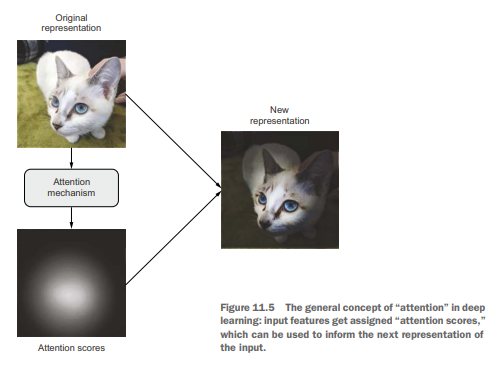

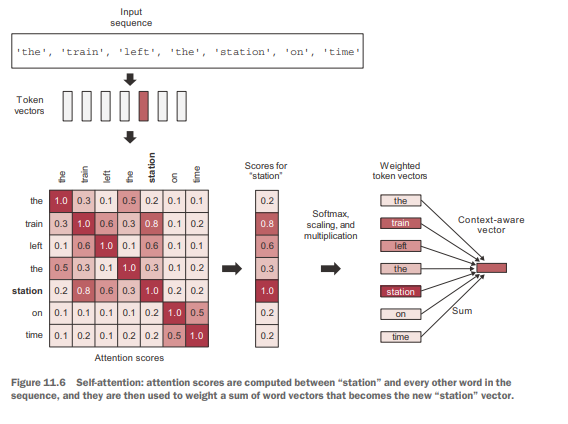

In [ ]:
def self_attention(input_sequence):
 output = np.zeros(shape=input_sequence.shape)
 for i, pivot_vector in enumerate(input_sequence):
  scores = np.zeros(shape=(len(input_sequence),))
  for j, vector in enumerate(input_sequence):
    scores[j] = np.dot(pivot_vector, vector.T)
 scores /= np.sqrt(input_sequence.shape[1])
 scores = softmax(scores)
 new_pivot_representation = np.zeros(shape=pivot_vector.shape)
 for j, vector in enumerate(input_sequence):
  new_pivot_representation += vector * scores[j]
 output[i] = new_pivot_representation
 return output


#  Iterate over each token
# in the input sequence.
# Compute the dot
# product (attention
# score) between the
# token and every
# other token.
# Scale by a
# normalization
# factor, and apply
# a softmax.
# Take the sum
# of all tokens
# weighted by the
# attention scores.
# That sum is
# our output.


The Transformer encoder

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class TransformerEncoder(layers.Layer):
    """Transformer Encoder layer implementation

    Args:
        embed_dim: Dimension of the input token embeddings
        dense_dim: Dimension of the inner dense layer
        num_heads: Number of attention heads
    """

    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim  # Size of input token vectors
        self.dense_dim = dense_dim  # Size of inner dense layer
        self.num_heads = num_heads  # Number of attention heads

        # Multi-head self-attention mechanism
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embed_dim
        )

        # Feed-forward network (2 dense layers)
        self.dense_proj = keras.Sequential([
            layers.Dense(dense_dim, activation="relu"),
            layers.Dense(embed_dim)
        ])

        # Layer normalization layers
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        """Forward pass for the encoder

        Args:
            inputs: Input tensor of shape (batch_size, sequence_length, embed_dim)
            mask: Optional mask tensor for padding

        Returns:
            Output tensor of same shape as inputs
        """
        # Prepare attention mask if provided
        if mask is not None:
            mask = mask[:, tf.newaxis, :]  # Expand mask dimensions

        # Self-attention block
        attention_output = self.attention(
            inputs, inputs,  # Self-attention (query=key=value=inputs)
            attention_mask=mask
        )

        # Residual connection + layer normalization
        proj_input = self.layernorm_1(inputs + attention_output)

        # Feed-forward network
        proj_output = self.dense_proj(proj_input)

        # Second residual connection + layer normalization
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        """Get layer configuration for serialization"""
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "dense_dim": self.dense_dim,
            "num_heads": self.num_heads,
        })
        return config

 Using the Transformer encoder for text classification

In [ ]:
vocab_size = 20000
embed_dim = 256
num_heads = 2
dense_dim = 32
inputs = keras.Input(shape=(None,), dtype="int64")
x = layers.Embedding(vocab_size, embed_dim)(inputs)
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
  loss="binary_crossentropy",
  metrics=["accuracy"])
model.summary()
# Since TransformerEncoder
# returns full sequences,
# we need to reduce each
# sequence to a single
# vector for classification
# via a global pooling layer.

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ (None, None, 256)      │     5,120,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder             │ (None, None, 256)      │       543,776 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 256)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,664,033 (21.61 MB)

 Trainable params: 5,664,033 (21.61 MB)

 Non-trainable params: 0 (0.00 B)

 Training and evaluating the Transformer encoder based model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "transformer_encoder.keras",
        save_best_only=True,  # Only save the best model
        monitor="val_accuracy",  # Monitor validation accuracy
        mode="max"  # Save when validation accuracy maximizes
    )
]

# Train the model
history = model.fit(
    int_train_ds,
    validation_data=int_val_ds,
    epochs=20,
    callbacks=callbacks
)

# Load the best saved model
model = keras.models.load_model(
    "transformer_encoder.keras",
    custom_objects={"TransformerEncoder": TransformerEncoder}
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(int_test_ds)
print(f"Test accuracy: {test_acc:.3f}")

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 241s 382ms/step - accuracy: 0.6187 - loss: 0.7596 - val_accuracy: 0.7358 - val_loss: 0.5135
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 236s 378ms/step - accuracy: 0.7455 - loss: 0.5095 - val_accuracy: 0.7504 - val_loss: 0.5077
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 235s 375ms/step - accuracy: 0.7651 - loss: 0.4796 - val_accuracy: 0.7706 - val_loss: 0.4642
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 236s 377ms/step - accuracy: 0.7748 - loss: 0.4590 - val_accuracy: 0.7734 - val_loss: 0.4674
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 235s 376ms/step - accuracy: 0.7877 - loss: 0.4388 - val_accuracy: 0.7698 - val_loss: 0.4636
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 235s 375ms/step - accuracy: 0.7987 - loss: 0.4253 - val_accuracy: 0.7720 - val_loss: 0.4671
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 235s 377ms/step - accuracy: 0.8042 - loss: 0.4154 - val_accuracy: 0.7704 - val_loss: 0.4721
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 235s 376ms/step - accuracy: 0.8077 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'transformer_encoder', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


285/782 ━━━━━━━━━━━━━━━━━━━━ 41s 84ms/step - accuracy: 0.7520 - loss: 0.5733

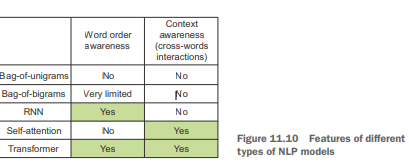

 Implementing positional embedding as a subclassed layer

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class PositionalEmbedding(layers.Layer):
    """Combines token embeddings with position embeddings

    Args:
        sequence_length: Maximum length of input sequences
        input_dim: Vocabulary size (number of unique tokens)
        output_dim: Dimension of the embedding vectors
    """

    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

        # Token embedding layer (learns word representations)
        self.token_embeddings = layers.Embedding(
            input_dim=input_dim,
            output_dim=output_dim
        )

        # Position embedding layer (learns position representations)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length,
            output_dim=output_dim
        )

    def call(self, inputs):
        """Forward pass that combines token and position embeddings

        Args:
            inputs: Input tensor of token indices (batch_size, sequence_length)

        Returns:
            Combined embeddings of shape (batch_size, sequence_length, output_dim)
        """
        length = tf.shape(inputs)[-1]  # Get actual sequence length (may vary)

        # Create position indices [0, 1, 2, ..., length-1]
        positions = tf.range(start=0, limit=length, delta=1)

        # Get embeddings for both tokens and positions
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)

        # Combine by adding them together
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        """Generates padding mask to ignore 0-padded tokens

        Args:
            inputs: Input tensor
            mask: Existing mask (unused in this implementation)

        Returns:
            Boolean mask tensor where True = real token, False = padding
        """
        return tf.math.not_equal(inputs, 0)  # Mask where input != 0

    def get_config(self):
        """Returns the layer configuration for serialization"""
        config = super().get_config()
        config.update({
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
            "output_dim": self.output_dim
        })
        return config

PUTTING IT ALL TOGETHER: A TEXT-CLASSIFICATION TRANSFORMER

 Combining the Transformer encoder with positional embedding

In [ ]:
class MyMaskingLayer(layers.Layer):
    def call(self, inputs):
        return tf.math.not_equal(inputs, 0)

inputs = keras.Input(shape=(None,), dtype="int64")
mask_layer = MyMaskingLayer()
mask = mask_layer(inputs)


In [ ]:
tensor_inputs = tf.convert_to_tensor(inputs)
mask_output = tf.math.not_equal(tensor_inputs, 0)


In [ ]:
vocab_size = 2000
sequence_length = 60
embed_dim = 256
num_heads = 2
dense_dim = 32
inputs = keras.Input(shape=(None,), dtype="int64")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(inputs) #***
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model.summary()
callbacks = [
 keras.callbacks.ModelCheckpoint("full_transformer_encoder.keras",
 save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=20,
callbacks=callbacks)
model = keras.models.load_model(
 "full_transformer_encoder.keras",
 custom_objects={"TransformerEncoder": TransformerEncoder,
 "PositionalEmbedding": PositionalEmbedding})
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

When to use sequence models over bag-of-words models

 When to use sequence models over bag-of-words models

## Beyond text classification: Sequence-to-sequence learning

sequence-to-sequence models.
 A sequence-to-sequence model takes a sequence as input (often a sentence or
paragraph) and translates it into a different sequence. This is the task at the heart of
many of the most successful applications of NLP:
 Machine translation—Convert a paragraph in a source language to its equivalent
in a target language.
 Text summarization—Convert a long document to a shorter version that retains
the most important information.
 Question answering—Convert an input question into its answer.
 Chatbots—Convert a dialogue prompt into a reply to this prompt, or convert the
history of a conversation into the next reply in the conversation.
 Text generation—Convert a text prompt into a paragraph that completes the prompt.
 Etc.
The general template behind sequence-to-sequence models is described in figure 11.12.
During training,
 An encoder model turns the source sequence into an intermediate representation.
 A decoder is trained to predict the next token i in the target sequence by looking
at both previous tokens (0 to i - 1) and the encoded source sequence.
During inference, we don’t have access to the target sequence—we’re trying to predict it from scratch. We’ll have to generate it one token at a time:
1 We obtain the encoded source sequence from the encoder.
2 The decoder starts by looking at the encoded source sequence as well as an initial “seed” token (such as the string "[start]"), and uses them to predict the
first real token in the sequence.

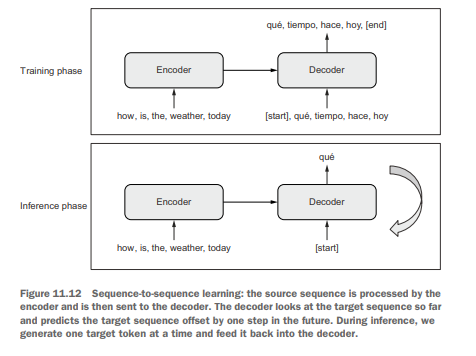

 # A machine translation example

In [ ]:
!wget http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
!unzip -q spa-eng.zip

--2025-05-27 18:39:06--  http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.207, 108.177.12.207, 108.177.11.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638744 (2.5M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   2.52M  --.-KB/s    in 0.008s  

2025-05-27 18:39:06 (323 MB/s) - ‘spa-eng.zip’ saved [2638744/2638744]



In [ ]:
!chmod 644 spa-eng/spa.txt


In [ ]:
text_file = "spa-eng/spa.txt"
with open(text_file) as f:
 lines = f.read().split("\n")[:-1]
text_pairs = []
for line in lines:
 english, spanish = line.split("\t")
 spanish = "[start] " + spanish + " [end]"
 text_pairs.append((english, spanish))
#  Iterate over the
# lines in the file.
# Each line contains an
# English phrase and its
# Spanish translation,
# tab-separated.

In [ ]:
import random
print(random.choice(text_pairs))

('How much should I be feeding my dog?', '[start] ¿Con cuánta comida debería estar alimentando a mi perro? [end]')


In [ ]:
# shuffel
import random
random.shuffle(text_pairs)
num_val_samples = int(0.15 * len(text_pairs))
num_train_samples = len(text_pairs) - 2 * num_val_samples
train_pairs = text_pairs[:num_train_samples]
val_pairs = text_pairs[num_train_samples:num_train_samples + num_val_samples]
test_pairs = text_pairs[num_train_samples + num_val_samples:]

Vectorizing the English and Spanish text pairs

In [ ]:
import tensorflow as tf
import string
import re
# Prepare a custom string
# standardization function for the
# Spanish TextVectorization layer:
# it preserves [ and ] but strips ¿
# (as well as all other characters
# from strings.punctuation).
strip_chars = string.punctuation + "¿"
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")
def custom_standardization(input_string):
 lowercase = tf.strings.lower(input_string)
 return tf.strings.regex_replace(
lowercase, f"[{re.escape(strip_chars)}]", "")
vocab_size = 1500
sequence_length = 20
source_vectorization = layers.TextVectorization(
 max_tokens=vocab_size,
 output_mode="int",
 output_sequence_length=sequence_length,
)
target_vectorization = layers.TextVectorization(
 max_tokens=vocab_size,
 output_mode="int",
 output_sequence_length=sequence_length + 1,
 standardize=custom_standardization,
)
train_english_texts = [pair[0] for pair in train_pairs]
train_spanish_texts = [pair[1] for pair in train_pairs]
source_vectorization.adapt(train_english_texts)
target_vectorization.adapt(train_spanish_texts)
# To keep things simple, we’ll only look at
# the top 15,000 words in each language,
# and we’ll restrict sentences to 20 words.
# The English
# layer
# The Spanish
# layer
# Generate Spanish sentences
# that have one extra token,
# since we’ll need to offset
# the sentence by one step
# during training.
# Learn the vocabulary
# of each language.

Preparing datasets for the translation task

In [ ]:
batch_size = 64
# The input Spanish sentence
# doesn’t include the last token
# to keep inputs and targets at
# the same length.
# The target Spanish sentence is
# one step ahead. Both are still
# the same length (20 words).
# Use in-memory
# caching to speed up
def format_dataset(eng, spa):
 eng = source_vectorization(eng)
 spa = target_vectorization(spa)
 return ({
 "english": eng,
 "spanish": spa[:, :-1],
 }, spa[:, 1:])
def make_dataset(pairs):
 eng_texts, spa_texts = zip(*pairs)
 eng_texts = list(eng_texts)
 spa_texts = list(spa_texts)
 dataset = tf.data.Dataset.from_tensor_slices((eng_texts, spa_texts))
 dataset = dataset.batch(batch_size)
 dataset = dataset.map(format_dataset, num_parallel_calls=4)
 return dataset.shuffle(2048).prefetch(16).cache()
train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)

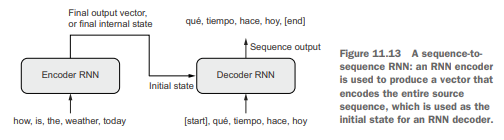

GRU-based encoder

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
embed_dim = 128
latent_dim = 512
source = keras.Input(shape=(None,), dtype="int64", name="english")
x = layers.Embedding(vocab_size, embed_dim, mask_zero=True)(source)
encoded_source = layers.Bidirectional(
 layers.GRU(latent_dim), merge_mode="sum")(x)

GRU-based decoder and the end-to-end model

In [ ]:
past_target = keras.Input(shape=(None,), dtype="int64", name="spanish")
x = layers.Embedding(vocab_size, embed_dim, mask_zero=True)(past_target)
decoder_gru = layers.GRU(latent_dim, return_sequences=True)
x = decoder_gru(x, initial_state=encoded_source)
x = layers.Dropout(0.5)(x)
target_next_step = layers.Dense(vocab_size, activation="softmax")(x)
seq2seq_rnn = keras.Model([source, past_target], target_next_step)

Training our recurrent sequence-to-sequence model

In [ ]:
seq2seq_rnn.compile(
 optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])
seq2seq_rnn.fit(train_ds, epochs=7, validation_data=val_ds)

 Translating new sentences with our RNN encoder and decoder

In [ ]:
import numpy as np
spa_vocab = target_vectorization.get_vocabulary()
spa_index_lookup = dict(zip(range(len(spa_vocab)), spa_vocab))
max_decoded_sentence_length = 20
def decode_sequence(input_sentence):
 tokenized_input_sentence = source_vectorization([input_sentence])
 decoded_sentence = "[start]"
 for i in range(max_decoded_sentence_length):
  tokenized_target_sentence = target_vectorization([decoded_sentence])
  next_token_predictions = seq2seq_rnn.predict(
  [tokenized_input_sentence, tokenized_target_sentence])
#  Convert the next
# token prediction to
# a string and append
# it to the generated
# sentence.
  sampled_token_index = np.argmax(next_token_predictions[0, i, :])
  sampled_token = spa_index_lookup[sampled_token_index]
  decoded_sentence += " " + sampled_token
  if sampled_token == "[end]":
    break
 return decoded_sentence
test_eng_texts = [pair[0] for pair in test_pairs]
for _ in range(20):
 input_sentence = random.choice(test_eng_texts)
 print("-")
 print(input_sentence)
 print(decode_sequence(input_sentence))

-
Tom first met Mary when they were in high school.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[start] tom [UNK] a mary a mary en la escuela [end]
-
I am tired of hearing that.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[start] estoy [UNK] de [UNK] [end]
-
Who does it belong to?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[start] quién se [UNK] [end]
-
It seems to me that he is honest.
1/1 ━━━━━━━━━━━━━━

Sequence-to-sequence learning with Transformer

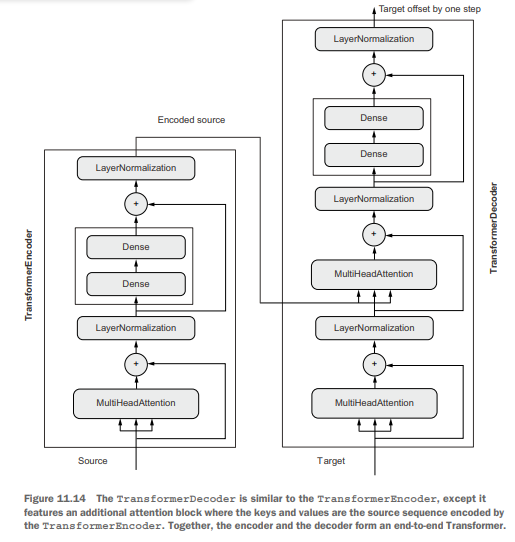

The TransformerDecoder

In [ ]:
 class TransformerDecoder(layers.Layer):
  def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
    super().__init__(**kwargs)
    self.embed_dim = embed_dim
    self.dense_dim = dense_dim
    self.num_heads = num_heads
    self.attention_1 = layers.MultiHeadAttention(
    num_heads=num_heads, key_dim=embed_dim)
    self.attention_2 = layers.MultiHeadAttention(
    num_heads=num_heads, key_dim=embed_dim)
    self.dense_proj = keras.Sequential(

      [layers.Dense(dense_dim, activation="relu"),
    layers.Dense(embed_dim),]
    )
    self.layernorm_1 = layers.LayerNormalization()
    self.layernorm_2 = layers.LayerNormalization()
    self.layernorm_3 = layers.LayerNormalization()
    self.supports_masking = True

# This attribute ensures that the layer will
# propagate its input mask to its outputs;
# masking in Keras is explicitly opt-in. If
# you pass a mask to a layer that doesn’t
# implement compute_mask() and that
# doesn’t expose this supports_masking
# attribute, that’s an error.

 def get_config(self):
  config = super().get_config()
  config.update({
  "embed_dim": self.embed_dim,
  "num_heads": self.num_heads,
  "dense_dim": self.dense_dim,
  })
  return config

TransformerDecoder method that generates a causal mask

In [ ]:
def get_causal_attention_mask(self, inputs):
  input_shape = tf.shape(inputs)
  batch_size, sequence_length = input_shape[0], input_shape[1]
  i = tf.range(sequence_length)[:, tf.newaxis]
  j = tf.range(sequence_length)
  mask = tf.cast(i >= j, dtype="int32")
  mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
  mult = tf.concat(
  [tf.expand_dims(batch_size, -1),
  tf.constant([1, 1], dtype=tf.int32)], axis=0)
  return tf.tile(mask, mult)

 The forward pass of the TransformerDecoder

In [ ]:
from tensorflow import keras
import tensorflow as tf

class TransformerDecoder(keras.layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        # تعریف لایه‌های یک مثال پیشنهادی
        self.mha_self = keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.mha_cross = keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential([
            keras.layers.Dense(dense_dim, activation="relu"),
            keras.layers.Dense(embed_dim)
        ])
        self.layernorm1 = keras.layers.LayerNormalization()
        self.layernorm2 = keras.layers.LayerNormalization()
        self.layernorm3 = keras.layers.LayerNormalization()
        self.dropout1 = keras.layers.Dropout(0.1)
        self.dropout2 = keras.layers.Dropout(0.1)
        self.dropout3 = keras.layers.Dropout(0.1)

    def call(self, decoder_inputs, encoder_outputs, training=False, **kwargs):
        # مرحله اول: self-attention برای ورودی دیکودر
        attn1 = self.mha_self(query=decoder_inputs, value=decoder_inputs, key=decoder_inputs)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(decoder_inputs + attn1)

        # مرحله دوم: cross-attention با خروجی‌های انکودر
        attn2 = self.mha_cross(query=out1, value=encoder_outputs, key=encoder_outputs)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(out1 + attn2)

        # مرحله سوم: شبکه فیدفوروارد
        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(out2 + ffn_output)
        return out3

    def compute_output_shape(self, input_shape):
        # به صورت نمونه می‌توان شکل خروجی را مثل ورودی فرض کرد
        # در صورت نیاز، این تابع را متناسب با معماری خود تغییر دهید.
        return input_shape


## A TRANSFORMER FOR MACHINE TRANSLATION
 End-to-end Transformer

In [ ]:
embed_dim = 128
dense_dim = 1024
num_heads = 8
encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="english")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)
#Encode the source sentence
encoder_outputs = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="spanish")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, encoder_outputs)
# Encode the target sentence and combine
# it with the encoded source sentence.
x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
#Predict a word for each output position.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'transformer_encoder_3' (of type TransformerEncoder) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'transformer_decoder_3' (of type TransformerDecoder) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Training the sequence-to-sequence Transformer

In [ ]:
transformer.compile(
 optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])
transformer.fit(train_ds, epochs=7, validation_data=val_ds)

Epoch 1/7
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 1847s 1s/step - accuracy: 0.7920 - loss: 1.2512 - val_accuracy: 0.8811 - val_loss: 0.6255
Epoch 2/7
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 1912s 1s/step - accuracy: 0.8796 - loss: 0.6427 - val_accuracy: 0.9226 - val_loss: 0.3784
Epoch 3/7
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 1803s 1s/step - accuracy: 0.9168 - loss: 0.4256 - val_accuracy: 0.9771 - val_loss: 0.1203
Epoch 4/7
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 1810s 1s/step - accuracy: 0.9822 - loss: 0.1068 - val_accuracy: 0.9988 - val_loss: 0.0083
Epoch 5/7
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 1804s 1s/step - accuracy: 0.9980 - loss: 0.0164 - val_accuracy: 0.9995 - val_loss: 0.0029
Epoch 6/7
1236/1302 ━━━━━━━━━━━━━━━━━━━━ 1:26 1s/step - accuracy: 0.9992 - loss: 0.0064

End-to-end Transformer

In [ ]:
embed_dim = 256
dense_dim = 2048
num_heads = 8
encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="english")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="spanish")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, encoder_outputs)
x = layers.Dropout(0.5)(x)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'transformer_encoder_4' (of type TransformerEncoder) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'transformer_decoder_4' (of type TransformerDecoder) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Translating new sentences with our Transformer model

In [ ]:
import numpy as np
spa_vocab = target_vectorization.get_vocabulary()
spa_index_lookup = dict(zip(range(len(spa_vocab)), spa_vocab))
max_decoded_sentence_length = 20
def decode_sequence(input_sentence):
 tokenized_input_sentence = source_vectorization([input_sentence])
 decoded_sentence = "[start]"
 for i in range(max_decoded_sentence_length):
  tokenized_target_sentence = target_vectorization(
  [decoded_sentence])[:, :-1]
  predictions = transformer(
  [tokenized_input_sentence, tokenized_target_sentence])
  sampled_token_index = np.argmax(predictions[0, i, :])
  sampled_token = spa_index_lookup[sampled_token_index]
  decoded_sentence += " " + sampled_token
  if sampled_token == "[end]":
    break
 return decoded_sentence
test_eng_texts = [pair[0] for pair in test_pairs]
for _ in range(20):
 input_sentence = random.choice(test_eng_texts)
 print("-")
 print(input_sentence)
 print(decode_sequence(input_sentence))

-
I'd like some more butter.
[start] dio debería causa ese especial fuego acuerdo manzanas beber razón luces luz oferta matemáticas se escuela avión incluso imposible atención
-
I'm having a rough week.
[start] dio debería acabado buen decidió anciano dejes negocio ustedes tengas paso marido mujer estaban casado comienzo sorprendido yo cuál porque
-
I'm from Singapore.
[start] dio debería acabado buen decidió anciano dejes negocio ustedes tengas paso marido mujer estaban casado comienzo sorprendido yo cuál porque
-
Tom doesn't think this is such a good idea.
[start] dio debería acabado buen decidió anciano dejes negocio ustedes tengas paso marido mujer estaban casado comienzo sorprendido yo cuál porque
-
That film is for children.
[start] dio debería acabado buen decidió anciano dejes negocio ustedes tengas paso marido mujer estaban casado comienzo sorprendido yo cuál porque
-
Tom bought something for Mary.
[start] dio debería acabado buen decidió anciano dejes negocio ustedes tengas p

Some sample results from the Transformer translation model

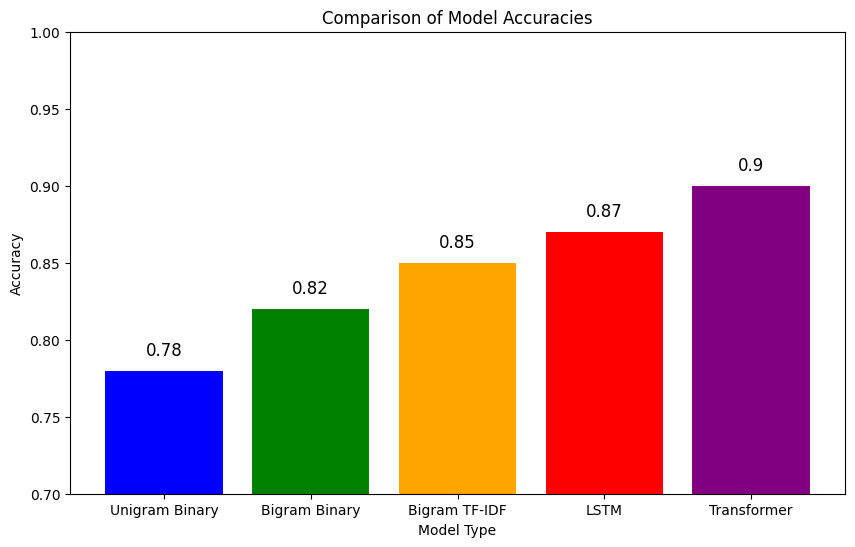

In [ ]:
import matplotlib.pyplot as plt

# داده‌های نمونه - دقت مدل‌های مختلف
models = ['Unigram Binary', 'Bigram Binary', 'Bigram TF-IDF', 'LSTM', 'Transformer']
accuracy = [0.78, 0.82, 0.85, 0.87, 0.90]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'green', 'orange', 'red', 'purple'])

plt.xlabel('Model Type')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.7, 1.0)

# نمایش مقدار دقت روی میله‌ها
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.01, str(v), ha='center', fontsize=12)

plt.show()
